完成了JHU Data Science 10个学习模块中的第4个： Exploratory Data Analysis

1. 模块中最有价值的一章是Week 4 Use Case 2，Dr. Peng录了一段40+分钟的案例分析视频，认真听一遍，可以了解在作类似这种数据分析时的逻辑思路框架是怎样的

1. 模块中第二有价值的是Week 4的Course Project，丢给你一大坨数据，给你一个业务上的问题，让你利用数据分析找到答案，进而可视化表达出来。作业本身不难，但可以把很多技能串起来，很好的锻炼

1. 很鲜明的观点：business question是任何Data Science研究首要和最先关注的问题。

1. SVD和PCA那部分讲的不好。上来先是一段文字描述，然后直接show me the code，高维空间里的故事讲的云里雾里，摸不清头脑。大概是顾虑受众的数学水平了，其实用一些线性代数知识，先把数学模型大概其介绍一番，然后再上代码，会讲的更清楚明白一些。

1. 承认吧，问世了40+年的R，至少在可视化输出方面，已经跟不上python了
    1. ggplot2 已经有了python下的实现，至少同样的好
    1. heatmap()简直丑到爆
    1. 生成的图想要保存到硬盘里，要先dev.copy()然后再来2-3遍dev.off()，直到屏幕上的图片消失才算存好。这个设计简直太古老了，像是latex -> dvi -> postscript --> pdf之类的古装剧情。而python现在则简洁的多

## Reproducible Research - Concepts and Ideas

1. gradient boosted 和 decision tree 在多CPU/GPUs环境下哪个更快一些

1. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/ 几张图的含义

1. 85%TRUE和15%FALSE的样本，与50%TRUE和50%FALSE的样本，分别适合用什么measure

1. 什么是SGD，SGD和GD的区别是什么

1. 什么是learning rate, learning rate too high / too low 分别会带来什么结果

1. 给NA设平均值，应当发生在train-test-split之前还是之后？

1. 什么是drop out, drop out的价值在哪里，如何使用drop out

1. (多选题)，选出哪些算法属于分类算法（除了最后一个选项之外，其他都是分类算法）

1. （多选题）支持向量机(SVM)的描述中，哪些是正确的。
    - 选项1，linear kernel function有助于划分不可分的数据（不选）When using a linear kernel, non-separable datasets became separable
    - （以下3个选项都与它近似）When using a linear kernel the SVM algorithm searches for the line that separates positive and negative examples that has the maximum distance to the negative examples.



## Structure of a data analysis
### Steps in a data analysis

- Define the question
- Define the ideal data set
    - Descriptive - a whole population
    - Exploratory - a random sample with many variables measured
    - Inferential - the right population, randomly sampled
    - Predictive - a training and test data set from the sample population
    - Causal - data from a randomized study
    - Mechanistic - data about all components of the system
- Determine what data you can access
- Obtain the data
- Clean the data
- Exploratory data analysis
- Statistical prediction/modelling
    - Should be informed by the results of your exploratory analysis
    - Exact methods depend on the question of interest
    - Transformation / processing should be accounted for when necessary
    - Measures of uncertainty should be reported
- Interpret results
- Challenge results
- Synthesiz/write up results
- Create reproducible code

In [3]:
# install.packages("kernlab")
library(kernlab)
data(spam)
str(spam[, 1:5])

'data.frame':	4601 obs. of  5 variables:
 $ make   : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address: num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all    : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our    : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...


In [4]:
set.seed(3435)
trainIndicator = rbinom(4601, size = 1, prob = 0.5)
table(trainIndicator)

trainIndicator
   0    1 
2314 2287 

In [5]:
trainSpam = spam[trainIndicator == 1,]
testSpam = spam[trainIndicator == 0,]

In [6]:
names(trainSpam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [7]:
table(trainSpam$type)


nonspam    spam 
   1381     906 

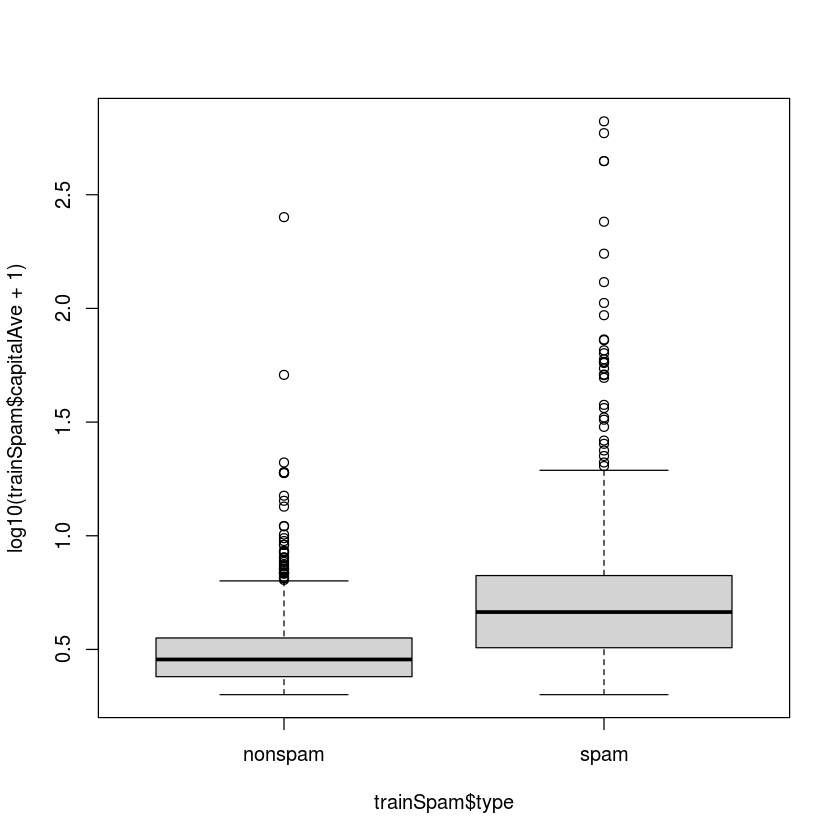

In [8]:
plot(log10(trainSpam$capitalAve + 1) ~ trainSpam$type)

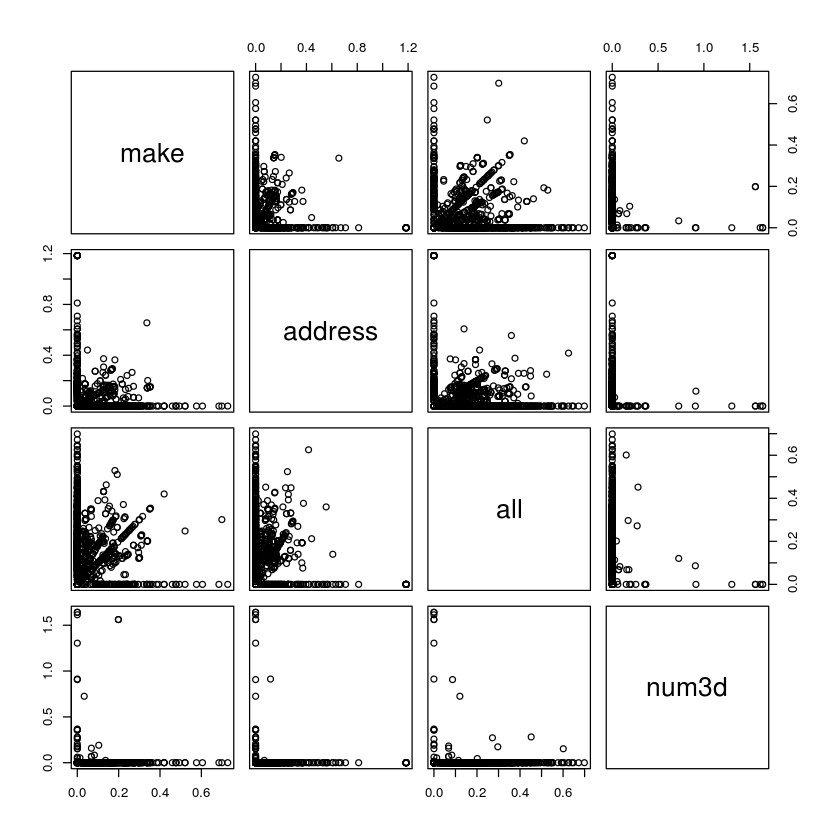

In [9]:
plot(log10(trainSpam[, 1:4] + 1))

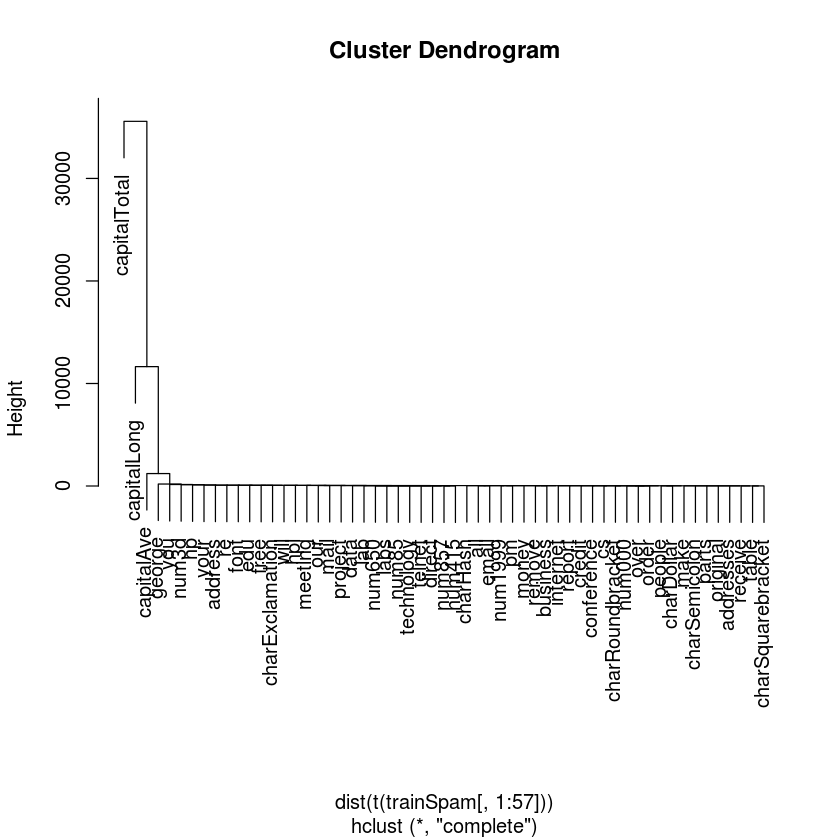

In [10]:
hCluster <- hclust(
    dist(
        t(trainSpam[, 1:57])
    )
)
plot(hCluster)
# result is not much helpful. 
# may be useful to do transformation (log) before doing clustering

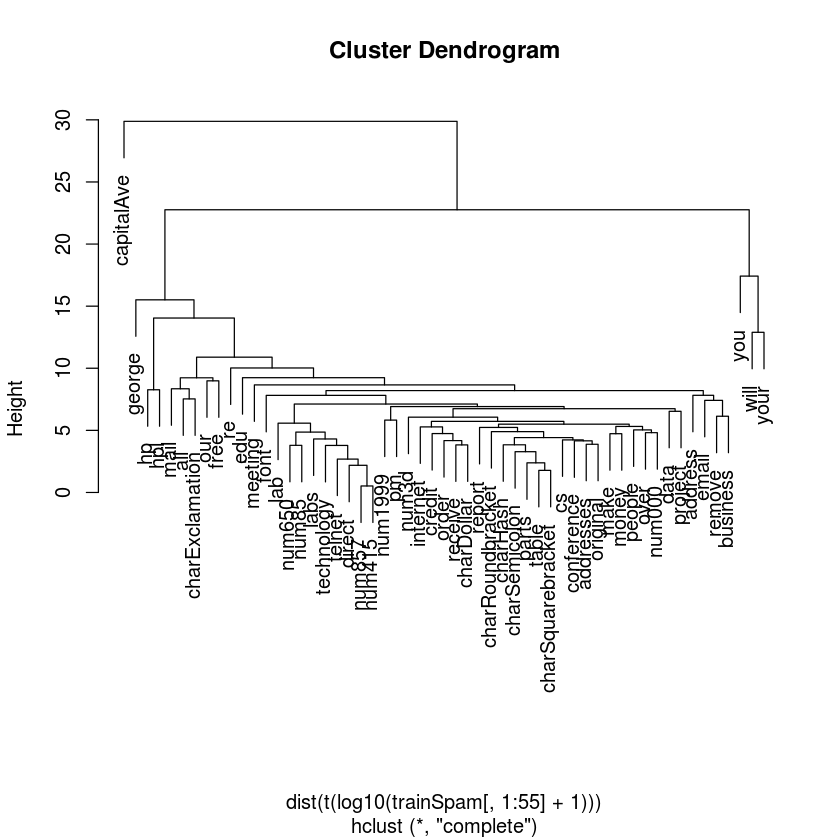

In [11]:
hClusterUpdated <- hclust(
    dist(
        t(
            log10(trainSpam[,1:55] + 1)
        )
    )
)
plot(hClusterUpdated)
# much better

In [26]:
# Statistical prediction / modelling
# Go through each of the variables in the data set,
# and try to fit a generalizing model, in this case 
# it is a logistic regression, to see if we can predict
# whether an email is spam or not by using just 
# a single variable

In [12]:
# spam = 1, notspam = 0
trainSpam$numType <- as.numeric(trainSpam$type) - 1
# calculate the cost function
costFunction <- function(x, y) sum(x != (y > 0.5))
cvError = rep(NA, 55)

library(boot)

for (i in 1:55){
    lmFormula = reformulate(
        names(trainSpam)[i], response = 'numType'
    )
    glmFit <- glm(lmFormula, family = "binomial", data = trainSpam)
    cvError[i] = cv.glm(trainSpam, glmFit, costFunction, 2)$delta[2]
}

# Which predictor has minimum cross-valided error?
names(trainSpam)[which.min(cvError)]

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm

[1] "charDollar"

In [36]:
# ?reformulate()

In [13]:
## Get a measure of uncertainty

## use the best model from the group
predictionModel <- glm(numType ~ charDollar
                       , family = 'binomial'
                       , data = trainSpam
                      )

## Get predictions on the test set
predictionTest <- predict(predictionModel, testSpam)
predictedSpam = rep("nonspam", dim(testSpam)[1])

## Classify as 'spam' for those with prob > 0.5
predictedSpam[predictionModel$fitted > 0.5] = 'spam'

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [14]:
table(predictedSpam)

predictedSpam
nonspam    spam 
   1804     510 

In [15]:
## Classification table 
table(predictedSpam, testSpam$type)

             
predictedSpam nonspam spam
      nonspam    1346  458
      spam         61  449

In [16]:
# Error rate
(61 + 458) / (1346 + 458 + 61 + 449)

[1] 0.2242869

## Organizing data analysis